# CNN - Example 01

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Keras Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Visualize data

(60000, 28, 28)
(28, 28)


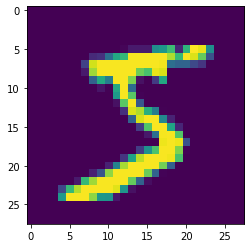

In [4]:
print(x_train.shape)
single_image = x_train[0]
print(single_image.shape)
plt.imshow(single_image)

### Pre-Process data

#### One Hot encode

In [5]:
# Make it one hot encoded otherwise it will think as a regression problem on a continuous axis
from tensorflow.keras.utils import to_categorical
print("Shape before one hot encoding" +str(y_train.shape))
y_example = to_categorical(y_train)
print(y_example)
print("Shape after one hot encoding" +str(y_train.shape))
y_example[0]

Shape before one hot encoding(60000,)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Shape after one hot encoding(60000,)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

#### Normalize the images

In [7]:
x_train = x_train/255
x_test = x_test/255

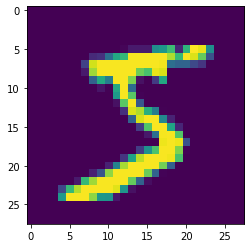

In [8]:
scaled_single = x_train[0]
plt.imshow(scaled_single)

#### Reshape the images

In [9]:
# Reshape to include channel dimension (in this case, 1 channel)
# x_train.shape
x_train = x_train.reshape(60000, 28, 28, 1)  
x_test = x_test.reshape(10000,28,28,1)

In [10]:
# ### Image data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

help(ImageDataGenerator)

In [12]:
datagen = ImageDataGenerator(
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

In [13]:
datagen.fit(x_train)

In [ ]:
it = datagen.flow(x_train, y_cat_train, batch_size=32)

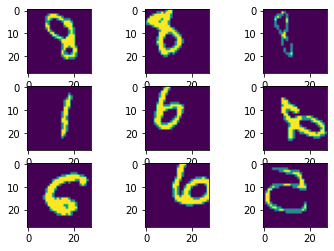

In [46]:
# Preparing the Samples and Plot for displaying output
for i in range(9):
	# preparing the subplot
	plt.subplot(330 + 1 + i)
	# generating images in batches
	batch = it.next()
	# Remember to convert these images to unsigned integers for viewing 
	image = batch[0][0].astype('uint8')
	# Plotting the data
	plt.imshow(image)
# Displaying the figure
plt.show()

### Model # 1

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Notes : If y is not one hot coded then loss= sparse_categorical_crossentropy

In [17]:
model.compile(loss='categorical_crossentropy',  
              optimizer='adam',
              metrics=['accuracy', 'categorical_accuracy']) 
              # we can add in additional metrics https://keras.io/metrics/

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


#### Add Early Stopping

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

##### Training using one hot encoding

In [21]:
# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(x_train, y_cat_train, batch_size=32),
                      epochs=10,
                      steps_per_epoch=len(x_train) / 32,
                      validation_data=(x_test,y_cat_test),
                      callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.7936 - accuracy: 0.7314 - categorical_accuracy: 0.7314 - val_loss: 1.2845 - val_accuracy: 0.6130 - val_categorical_accuracy: 0.6130
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4378 - accuracy: 0.8566 - categorical_accuracy: 0.8566 - val_loss: 1.2633 - val_accuracy: 0.6164 - val_categorical_accuracy: 0.6164
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3534 - accuracy: 0.8854 - categorical_accuracy: 0.8854 - val_loss: 1.3131 - val_accuracy: 0.5655 - val_categorical_accuracy: 0.5655 - loss: 0.3545 - accuracy: 0.8847 - categ
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3062 - accuracy: 0.9017 - categorical_accuracy: 0.9017 - val_loss: 1.3775 - val_accuracy: 0.5831 - val_categorical_accuracy: 0.5831


#### Save model

Saving model
from tensorflow.keras.models import load_model
model_file = 'D:\\Sandbox\\Github\\MODELS\\' + '01_mnist.h5'
model.save(model_file)

#### Retreive model

Retrieve model
model = load_model(model_file)

#### Evaluate

Rule of thumb
1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

#### Eval - Train

In [22]:
model.metrics_names

['loss', 'accuracy', 'categorical_accuracy']

In [23]:
pd.DataFrame(history.history).head()
#pd.DataFrame(model.history.history).head()

,loss,accuracy,categorical_accuracy,val_loss,val_accuracy,val_categorical_accuracy
0,0.793562,0.731367,0.731367,1.284451,0.6130,0.6130
1,0.437794,0.856567,0.856567,1.263253,0.6164,0.6164
2,0.353388,0.885400,0.885400,1.313078,0.5655,0.5655
3,0.306199,0.901733,0.901733,1.377544,0.5831,0.5831


pd.DataFrame(history.history).plot()

In [24]:
losses = pd.DataFrame(history.history)

<AxesSubplot:>

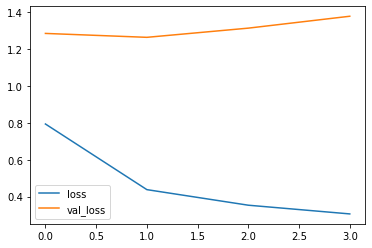

In [25]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

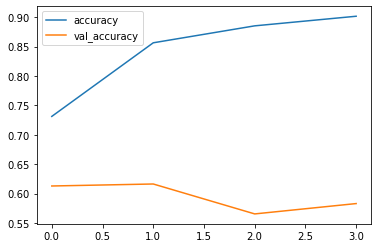

In [26]:
losses[['accuracy','val_accuracy']].plot()

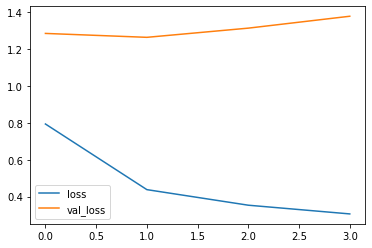

In [27]:
# Plot loss per iteration
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

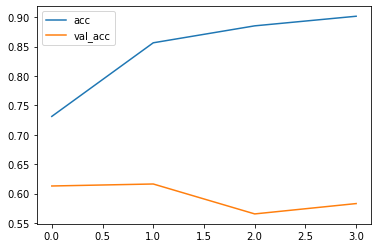

In [28]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

#### Eval - Test

In [29]:
test_metrics = model.evaluate(x_test,y_cat_test,verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 1.3775 - accuracy: 0.5831 - categorical_accuracy: 0.5831


In [30]:
print('Loss on test dataset:', test_metrics[0])
print('Accuracy on test dataset:', test_metrics[1])

Loss on test dataset: 1.377543568611145
Accuracy on test dataset: 0.5831000208854675


In [31]:
print("Loss and Accuracy on Train dataset:")

Loss and Accuracy on Train dataset:


In [32]:
pd.DataFrame(history.history).tail(1)

,loss,accuracy,categorical_accuracy,val_loss,val_accuracy,val_categorical_accuracy
3,0.306199,0.901733,0.901733,1.377544,0.5831,0.5831


As it turns out, the accuracy on the test dataset is smaller than the accuracy on the training dataset. 
This is completely normal, since the model was trained on the `train_dataset`. 
When the model sees images it has never seen during training, (that is, from the `test_dataset`), 
we can expect performance to go down. 

#### Prediction

In [33]:
y_prediction = np.argmax(model.predict(x_test), axis=-1)

#### Reports

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       980
           1       1.00      0.03      0.06      1135
           2       0.98      0.47      0.64      1032
           3       0.87      0.40      0.55      1010
           4       0.47      0.93      0.62       982
           5       0.98      0.22      0.36       892
           6       0.94      0.81      0.87       958
           7       1.00      0.41      0.58      1028
           8       0.26      0.99      0.41       974
           9       0.91      0.74      0.81      1009

    accuracy                           0.58     10000
   macro avg       0.83      0.59      0.58     10000
weighted avg       0.83      0.58      0.57     10000

[[905   0   0   0   0   0  17   0  50   8]
 [ 54  36   3   0 998   0   2   0  42   0]
 [ 21   0 486  10   9   0  26   0 478   2]
 [ 10   0   1 402   0   2   3   0 587   5]
 [  2   0   0   0 911   0   2   0  51  16]
 [  4   0   4  51   1 196 

Recall (sensivity)   : Fraud detection recall because you want to catch FN (real fraud guys)
Precision (specificity): Sentiment analysis precision is important. You want to catch all feeling FP ()
F1 score  : Higher is better to compare two or more models
accuracy  : higher is better
error     : 1 - accuracy
Ideally, We want both Precision & Recall to be 1 but it is a zero-sum game. You can't have both 

<AxesSubplot:>

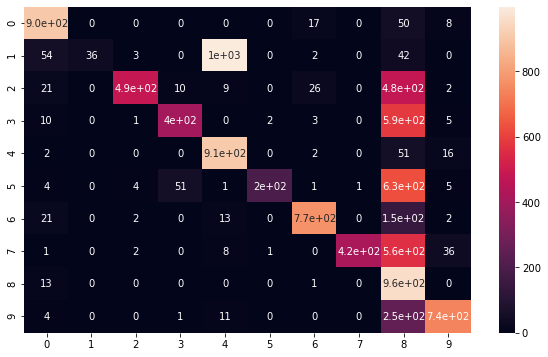

In [35]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

#### Predictions go wrong!

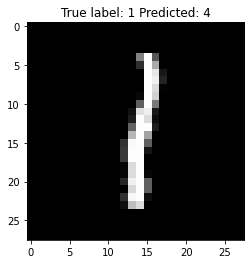

In [37]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_prediction[i]));

#### Final thoughts

Rule of thumb
1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

In [39]:
print("Percentage of wrong predcitions : " + str(len(misclassified_idx)/len(y_prediction)*100) + " %")
print("Models maximum accuracy            : " + str(np.max(history.history['accuracy'])*100) + " %")
print("Models maximum validation accuracy : " + str(np.max(history.history['val_accuracy'])*100) + " %")

Percentage of wrong predcitions : 41.69 %
Models maximum accuracy            : 90.17333388328552 %
Models maximum validation accuracy : 61.640000343322754 %


Model has Low Bias and High Variance with more than 29% gap. The recall is also bad. Image augmentation 
doesn't help here. Augumentation with rotation and tilting doesn't help b/c it is a unique digital shape.